In [3]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
# to save and write as pngs
from imageio import imwrite, imread
import math
from scipy import ndimage as ndi

In [167]:
def plt_fig_hist(image):
    plt.figure(figsize=(12,12));
    plt.subplot(1, 2, 1);
    plt.imshow(image, cmap='gray');
    plt.xlabel('x');
    plt.ylabel('y');
    plt.subplot(1, 2, 2);
    uniqe = np.unique(image, return_counts=True);
    plt.plot(uniqe[0],uniqe[1]);
    plt.xlabel('pixel values');
    plt.ylabel('counts');
    plt.show();
    
def print_info(image):
    unique = np.unique(image);
    print('The first 15 values in the image: \n', unique[0:15]);
    print('number of values in the image: ',len(unique));
    print('the image size: {}, dimensions: {} and the shape: {}'.format(image.size, image.ndim, image.shape));    
    
def give_transferMatrix(scaling):
    sx=scaling[0]
    sy=scaling[1]
    scale_matrix = [[sx, 0],
                [0, sy]]
    return scale_matrix

def build_weighMatrix(image):
    G = np.zeros((image.shape[0]**2,image.shape[1]**2));
    fltn_img = np.abs(image.flatten()); # not sure about the absolute belopp but there exist some negative values!
    std_img = np.std(image);
#     r = G.shape[0]/2;
#     r = 10;
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            intens = np.exp(-(math.sqrt(math.pow(fltn_img[i] - fltn_img[j], 2)))/std_img);
            G[i,j] = intens;
#             spatial = np.exp(-math.sqrt(math.pow(i-j, 2)));
#             G[i,j] = intens*spatial;
#             if  np.abs(i-j) < r :
#                 G[i,j] = 0;
            
    return G;

In [46]:
image = imread("testImagio_dicom.png");

In [48]:
print_info(image);

The first 15 values in the image: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
number of values in the image:  246
the image size: 262144, dimensions: 2 and the shape: (512, 512)


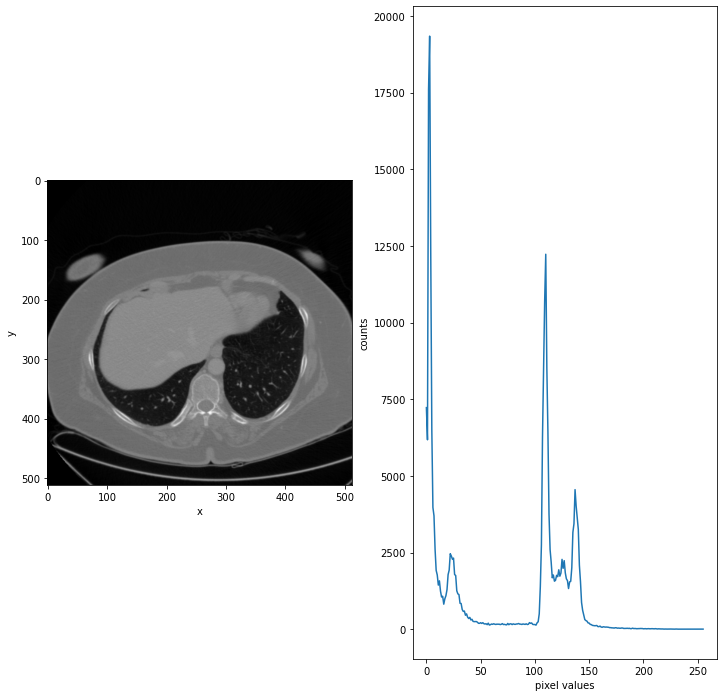

In [49]:
plt_fig_hist(image);

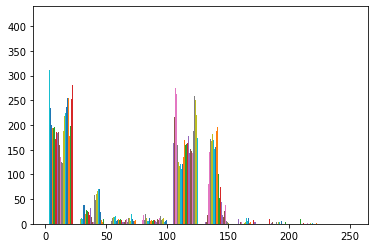

In [26]:
plt.hist(image)
plt.show()

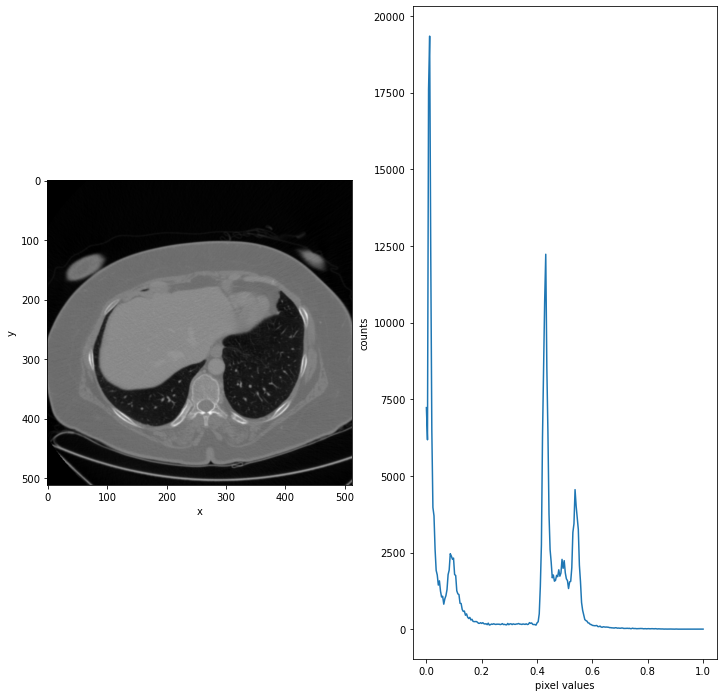

In [14]:
norm_img = image/np.max(image);
plt_fig_hist(norm_img);

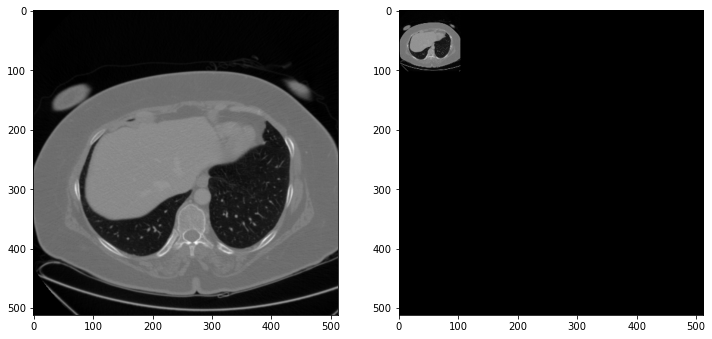

In [50]:
scaling_factor = 5;
transf_matrix = give_transferMatrix([scaling_factor, scaling_factor]);

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
ssd_reg_img = ndi.interpolation.affine_transform(norm_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(norm_img, cmap='gray')
plt.subplot(122)
plt.imshow(ssd_reg_img, cmap='gray')
plt.show()

In [51]:
scaled_image = ssd_reg_img[0:int(round(image.shape[0]/scaling_factor)), 0:int(round(image.shape[1]/scaling_factor))];

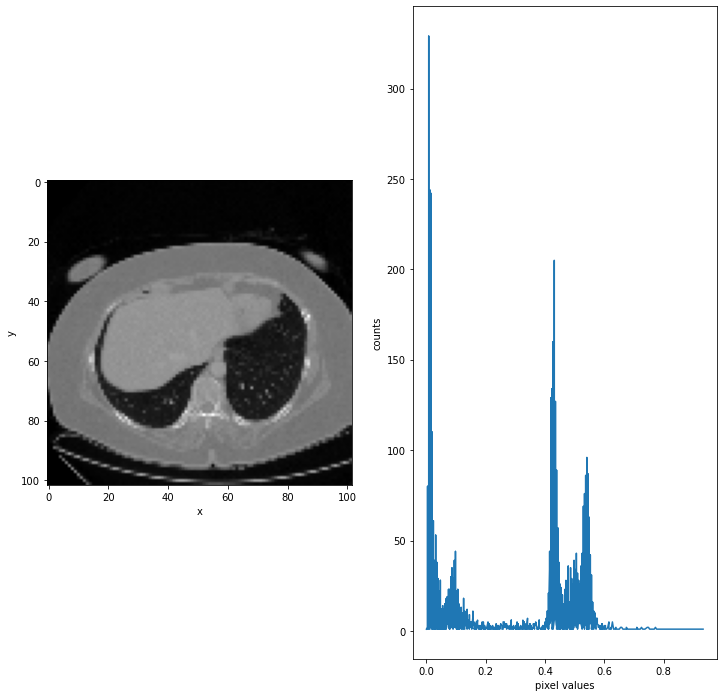

In [52]:
plt_fig_hist(scaled_image)

In [53]:
print_info(scaled_image)

The first 15 values in the image: 
 [-1.37680051e-17 -1.85935794e-18 -8.76818973e-19 -8.66062271e-19
 -7.31758807e-19 -7.29935053e-19 -6.46444372e-19 -4.20735756e-19
 -4.17151476e-19 -3.25155763e-19 -2.73785809e-19 -2.44695476e-19
 -2.36157590e-19 -1.51166089e-19 -1.11795813e-19]
number of values in the image:  1083
the image size: 10404, dimensions: 2 and the shape: (102, 102)


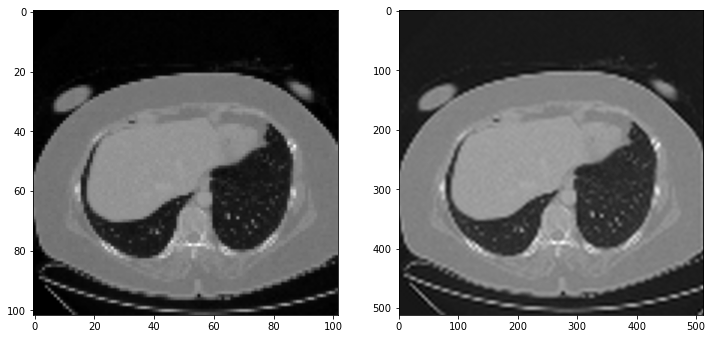

In [54]:
# test to go back to original size, loose resolution! maybe it's okey, we only need to obtain a segmentation mask to
# put on/merge with the original image!
invers_scaling_factor = 1/scaling_factor;
transf_matrix = give_transferMatrix([invers_scaling_factor , invers_scaling_factor]);

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
ssd_reg_img_test = ndi.interpolation.affine_transform(ssd_reg_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(scaled_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ssd_reg_img_test, cmap='gray')
plt.show()

In [168]:
test = build_weighMatrix(scaled_image);

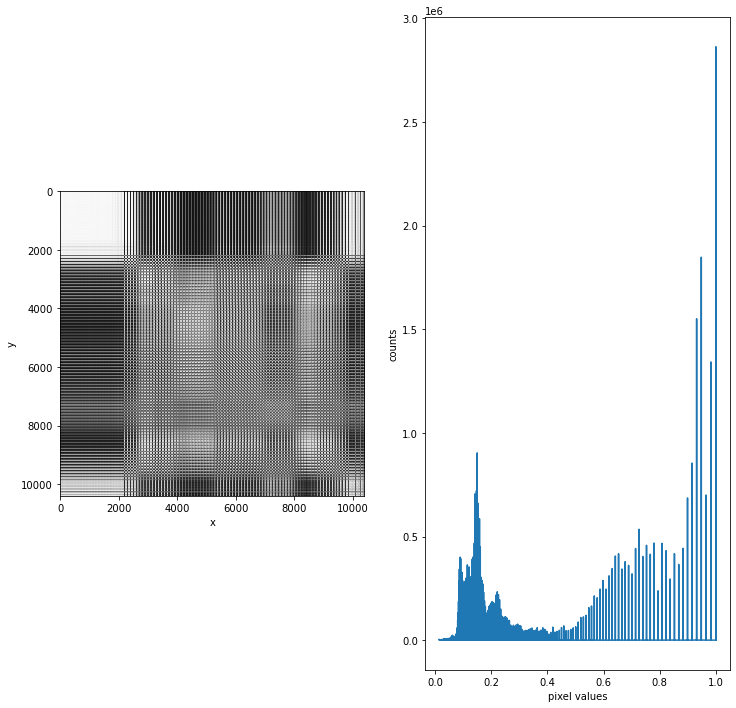

In [171]:
plt_fig_hist(test);

In [173]:
print_info(test)

The first 15 values in the image: 
 [0.0147368  0.01500026 0.01554141 0.01581926 0.01581926 0.01581926
 0.01610208 0.01610208 0.01638996 0.01638996 0.01668298 0.01668298
 0.01698124 0.01698124 0.01728483]
number of values in the image:  2945
the image size: 108243216, dimensions: 2 and the shape: (10404, 10404)


In [126]:
g = build_weighMatrix(scaled_image);

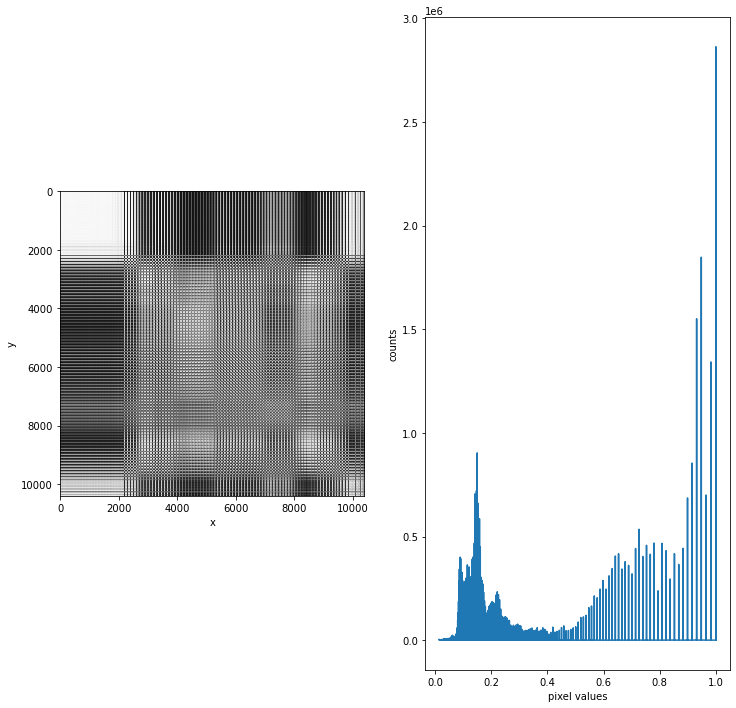

In [127]:
plt_fig_hist(g);

In [129]:
print_info(g)

The first 15 values in the image: 
 [0.0147368  0.01500026 0.01554141 0.01581926 0.01581926 0.01581926
 0.01610208 0.01610208 0.01638996 0.01638996 0.01668298 0.01668298
 0.01698124 0.01698124 0.01728483]
number of values in the image:  2945
the image size: 108243216, dimensions: 2 and the shape: (10404, 10404)


In [147]:
 # not sure
sparse_g = g;
sparse_g[sparse_g<0.2]=0;

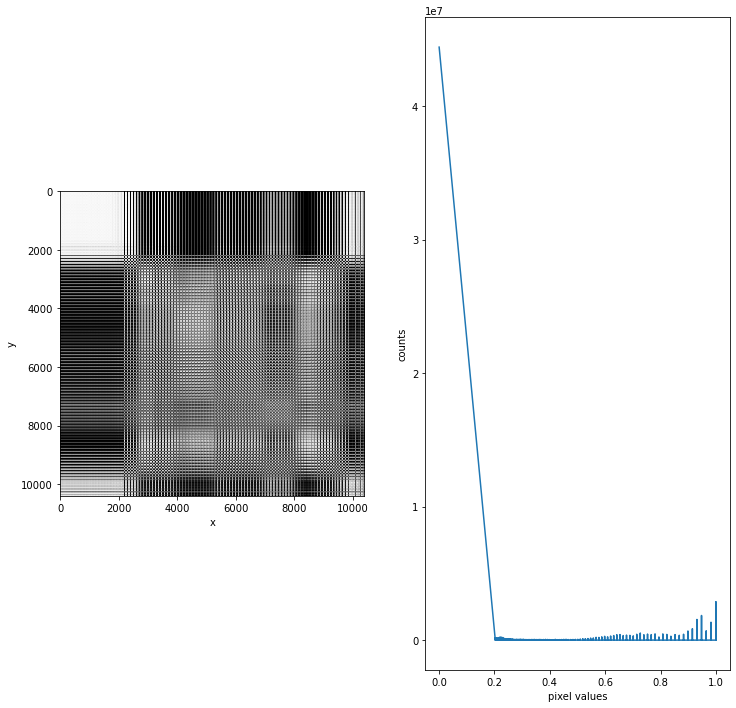

In [148]:
plt_fig_hist(sparse_g);

In [149]:
print_info(sparse_g);

The first 15 values in the image: 
 [0.         0.20294545 0.20294545 0.20294545 0.20294545 0.20294545
 0.20294545 0.20294545 0.20294545 0.20294545 0.20294545 0.20294545
 0.20294545 0.20294545 0.20294545]
number of values in the image:  1765
the image size: 108243216, dimensions: 2 and the shape: (10404, 10404)


In [82]:
# np.savetxt("Ahmad_simi_matrix.csv", g, fmt='%1.4f', delimiter=",")
# imwrite(str("Ahmad_simi_matrix.png"), g)
# i = imread("Ahmad_simi_matrix.png");
# i = i/np.max(i)

In [150]:
eig = np.linalg.eig(g);
sparse_eig = np.linalg.eig(sparse_g);

# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [144]:
print(eig[1][:])

[[ 9.43205078e-03+0.00000000e+00j -1.16977962e-02+0.00000000e+00j
  -2.82825936e-03+0.00000000e+00j ...  1.58168969e-17+1.00838829e-18j
  -1.63989710e-18-3.86508086e-19j -1.63989710e-18+3.86508086e-19j]
 [ 9.43205078e-03+0.00000000e+00j -1.16977962e-02+0.00000000e+00j
  -2.82825936e-03+0.00000000e+00j ... -2.09205300e-15+7.22673695e-16j
  -6.24436257e-16+2.03618640e-16j -6.24436257e-16-2.03618640e-16j]
 [ 9.43205078e-03+0.00000000e+00j -1.16977962e-02+0.00000000e+00j
  -2.82825936e-03+0.00000000e+00j ...  1.01226977e-15-2.10578822e-16j
   2.28107175e-16+3.84826690e-18j  2.28107175e-16-3.84826690e-18j]
 ...
 [ 9.43205078e-03+0.00000000e+00j -1.16977962e-02+0.00000000e+00j
  -2.82825936e-03+0.00000000e+00j ...  2.81831727e-09-4.05909377e-09j
   2.88662261e-09-2.05032100e-09j  2.88662261e-09+2.05032100e-09j]
 [ 9.43205078e-03+0.00000000e+00j -1.16977962e-02+0.00000000e+00j
  -2.82825936e-03+0.00000000e+00j ... -2.82336989e-09+4.06090907e-09j
  -2.88826331e-09+2.05074573e-09j -2.88826331e-

(4930.2454198367805+0j)


C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


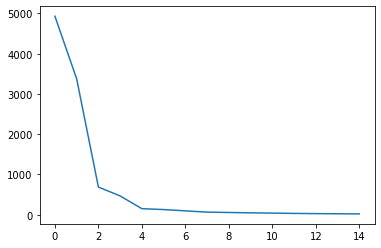

In [156]:
print(np.max(eig[0]))
plt.plot(eig[0][0:15]) # first 15 eigen values


(4377.168583569077+0j)


C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


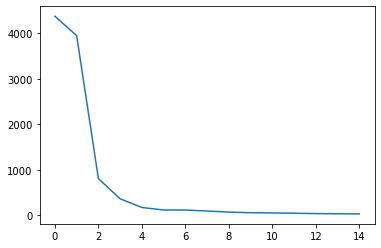

In [157]:
print(np.max(sparse_eig[0]))
plt.plot(sparse_eig[0][0:15]) # first 15 eigen values

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


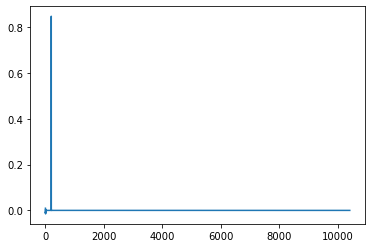

In [136]:
plt.plot(eig[1][0]); # plot first eigenVector

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


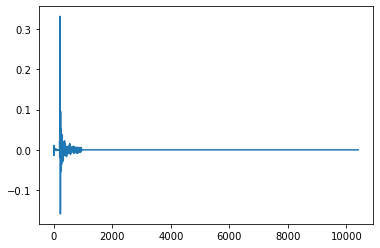

In [158]:
plt.plot(sparse_eig[1][0]); # plot first eigenVector

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


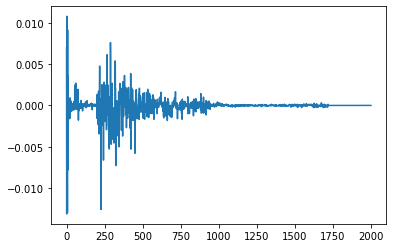

In [166]:
plt.plot(sparse_eig[1][2][0:2000]); # plot the third eigenvector


C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


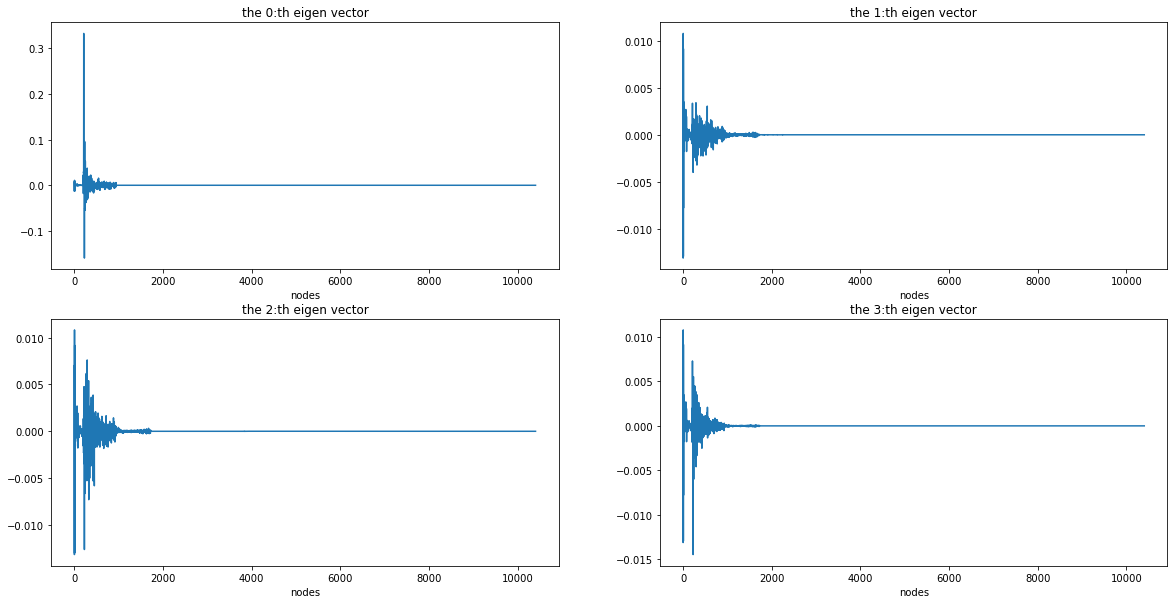

In [163]:
plt.figure(figsize=(20,10));
plt.subplot(2, 2, 1);
plt.plot(sparse_eig[1][0]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(0));
plt.subplot(2, 2, 2);
plt.plot(sparse_eig[1][1]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(1));
plt.subplot(2, 2, 3);
plt.plot(sparse_eig[1][2]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(2));
plt.subplot(2, 2, 4);
plt.plot(sparse_eig[1][3]);
plt.xlabel('nodes');
plt.title('the {}:th eigen vector'.format(3));
plt.show();

In [ ]:
# All below is old stuff, probably gonna delet all but keep it just for now in case something might be useful

number of values in image:  246


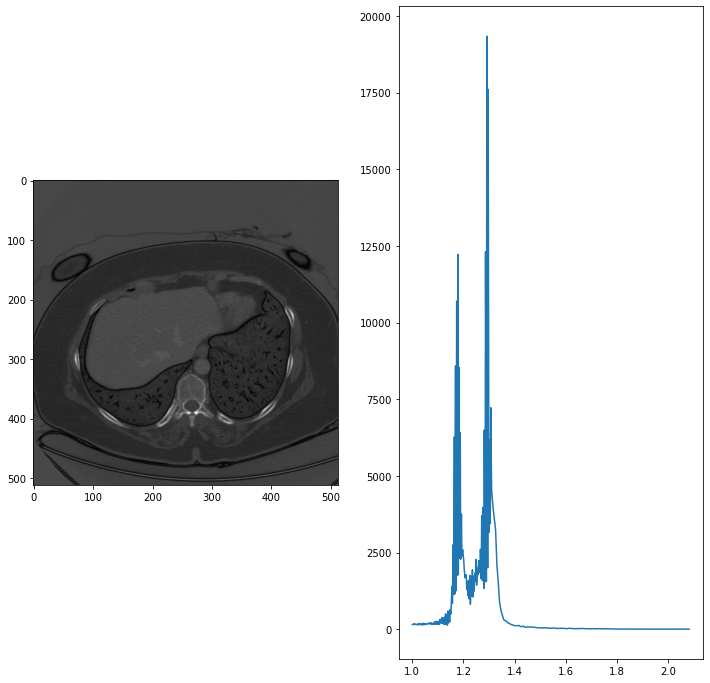

In [48]:
# g = build_weighMatrix(image); # som kind of 
# print('number of values in image: ',len(np.unique(g)));
# plt.figure(figsize=(12,12))
# plt.subplot(1, 2, 1)
# plt.imshow(g, cmap='gray')
# plt.subplot(1, 2, 2)
# uniqeg = np.unique(g, return_counts=True)
# plt.plot(uniqeg[0],uniqeg[1])
# plt.show();

number of values in image:  246


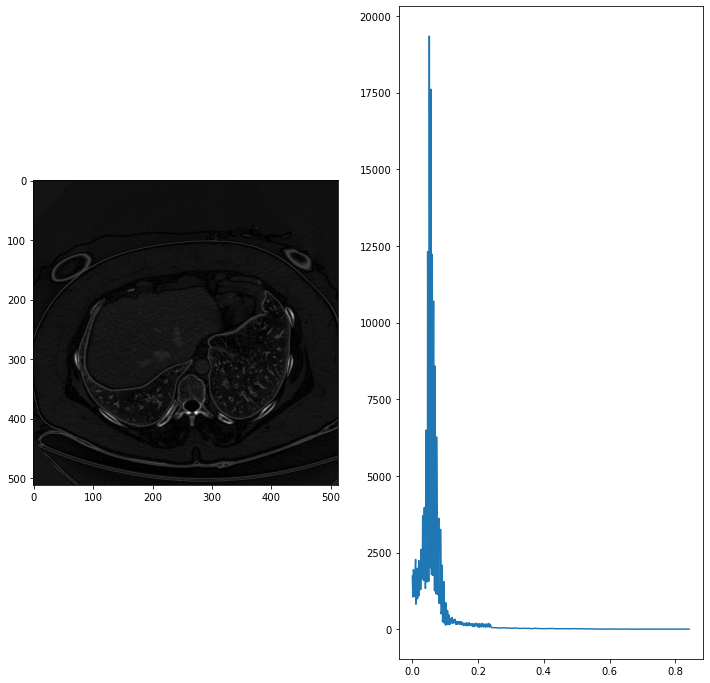

In [49]:
# gtest = np.abs(g - np.mean(g))
# print('number of values in image: ',len(np.unique(gtest)));
# plt.figure(figsize=(12,12))
# plt.subplot(1, 2, 1)
# plt.imshow(gtest, cmap='gray')
# plt.subplot(1, 2, 2)
# uniqegtest = np.unique(gtest, return_counts=True)
# plt.plot(uniqegtest[0],uniqegtest[1])
# plt.show();

number of values in image:  138


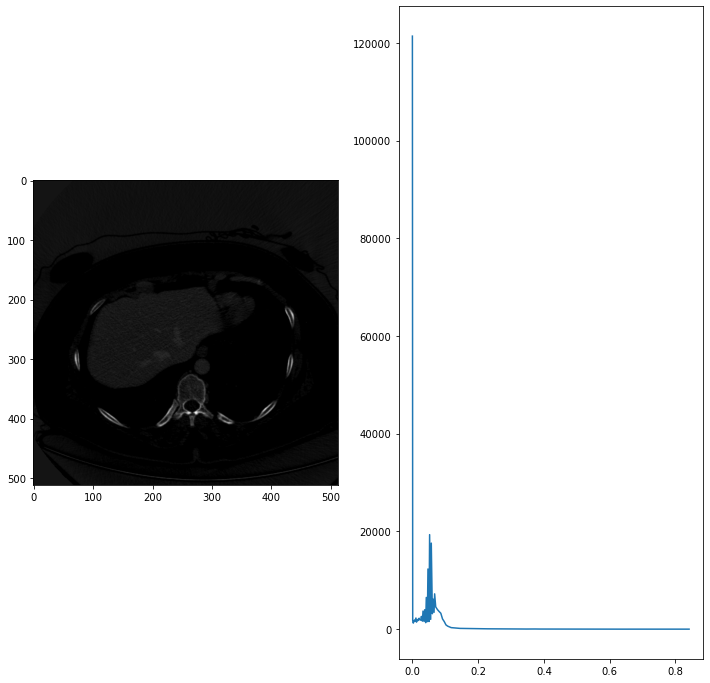

In [50]:
# test = g - np.mean(g);
# test[test<0]=0;
# print('number of values in image: ',len(np.unique(test)));
# plt.figure(figsize=(12,12))
# plt.subplot(1, 2, 1)
# plt.imshow(test, cmap='gray')
# plt.subplot(1, 2, 2)
# uniqtest = np.unique(test, return_counts=True)
# plt.plot(uniqtest[0],uniqtest[1])
# plt.show();

In [61]:
# eig = np.linalg.eig(test)
# np.max(eig[0])

(15.503624379091253+0j)

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


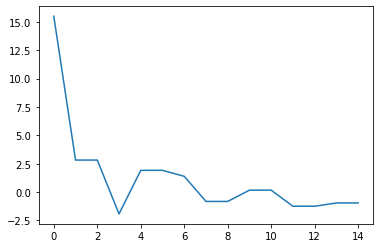

In [63]:

# plt.plot(eig[0][0:15]) # first 10 eigen values

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


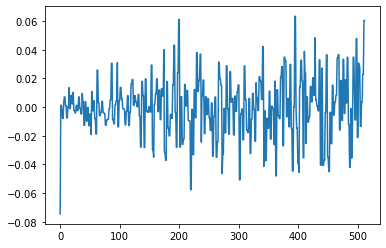

In [69]:
# plt.plot(eig[1][0])

In [65]:
# ?eig